In [92]:
import sys
print(sys.executable)


c:\Python314\python.exe


In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [94]:
df = pd.read_csv(r"C:\Users\saiko\Downloads\sdss_100k_galaxy_form_burst.csv", header=1)
df.head()

,objid,specobjid,ra,dec,u,g,r,i,z,modelFlux_u,...,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,class,subclass,redshift,redshift_err
0,1237646587710669400,8175185722644649984,82.038679,0.847177,21.73818,20.26633,19.32409,18.64037,18.23833,2.007378,...,19.43575,0.099951,0.311864,0.289370,0.270588,0.187182,GALAXY,STARFORMING,0.067749,0.000015
1,1237646588247540577,8175186822156277760,82.138894,1.063072,20.66761,19.32016,18.67888,18.24693,18.04122,5.403369,...,18.85012,0.366549,0.516876,0.517447,0.552297,0.636966,GALAXY,STARFORMING,0.105118,0.000010
2,1237646588247540758,8175187097034184704,82.028510,1.104003,23.63531,21.19671,19.92297,19.31443,18.68396,0.295693,...,19.42235,0.050000,0.417137,0.506950,0.549881,0.370166,GALAXY,STARFORMING,0.234089,0.000030
3,1237648702973083853,332152325571373056,198.544469,-1.097059,20.12374,18.41520,17.47202,17.05297,16.72423,8.920645,...,18.03204,0.310763,0.356827,0.389345,0.388160,0.416660,GALAXY,STARFORMING,0.110825,0.000030
4,1237648702973149350,332154249716721664,198.706864,-1.046217,-9999.00000,-9999.00000,18.37762,18.13383,17.78497,0.000000,...,19.02880,-9999.000000,-9999.000000,0.050000,0.050000,0.149973,GALAXY,STARFORMING,0.136658,0.000021


In [95]:
df.shape

(100000, 43)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   objid         100000 non-null  int64  
 1   specobjid     100000 non-null  uint64 
 2   ra            100000 non-null  float64
 3   dec           100000 non-null  float64
 4   u             100000 non-null  float64
 5   g             100000 non-null  float64
 6   r             100000 non-null  float64
 7   i             100000 non-null  float64
 8   z             100000 non-null  float64
 9   modelFlux_u   100000 non-null  float64
 10  modelFlux_g   100000 non-null  float64
 11  modelFlux_r   100000 non-null  float64
 12  modelFlux_i   100000 non-null  float64
 13  modelFlux_z   100000 non-null  float64
 14  petroRad_u    100000 non-null  float64
 15  petroRad_g    100000 non-null  float64
 16  petroRad_i    100000 non-null  float64
 17  petroRad_r    100000 non-null  float64
 18  petro

In [97]:
df.isnull().sum()

objid           0
specobjid       0
ra              0
dec             0
u               0
g               0
r               0
i               0
z               0
modelFlux_u     0
modelFlux_g     0
modelFlux_r     0
modelFlux_i     0
modelFlux_z     0
petroRad_u      0
petroRad_g      0
petroRad_i      0
petroRad_r      0
petroRad_z      0
petroFlux_u     0
petroFlux_g     0
petroFlux_i     0
petroFlux_r     0
petroFlux_z     0
petroR50_u      0
petroR50_g      0
petroR50_i      0
petroR50_r      0
petroR50_z      0
psfMag_u        0
psfMag_r        0
psfMag_g        0
psfMag_i        0
psfMag_z        0
expAB_u         0
expAB_g         0
expAB_r         0
expAB_i         0
expAB_z         0
class           0
subclass        0
redshift        0
redshift_err    0
dtype: int64

In [98]:
df['subclass'].replace(['STARFORMING','STARBURST'],[0,1],inplace=True)

In [99]:
df.describe()

,objid,specobjid,ra,dec,u,g,r,i,z,modelFlux_u,...,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,subclass,redshift,redshift_err
count,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237659e+18,2.303595e+18,180.577802,23.472475,18.518622,17.258221,16.821739,16.362611,15.850865,30.683321,...,18.020203,17.435735,-0.603667,-0.522111,-0.309462,-0.410153,-0.740964,0.250070,0.116753,0.000179
std,6.103756e+12,2.531359e+18,75.751994,21.140744,105.082004,105.069066,95.035474,100.171155,114.206165,76.552859,...,100.181687,114.218604,104.870665,104.871474,94.860919,99.991654,114.005927,0.433055,0.100169,0.052189
min,1.237646e+18,2.994897e+17,0.008745,-11.244273,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-47.451720,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,0.000000,-0.000833,0.000002
25%,1.237655e+18,8.130687e+17,138.741880,3.120118,18.762215,17.505868,16.898845,16.527097,16.281327,9.288132,...,18.295627,17.991602,0.299999,0.398705,0.418789,0.418656,0.381288,0.000000,0.055836,0.000008
50%,1.237659e+18,1.457564e+18,181.492972,20.913596,19.349715,18.072640,17.459080,17.091385,16.861105,18.195690,...,18.845780,18.563315,0.508688,0.588335,0.604795,0.604254,0.575397,0.000000,0.085850,0.000011
75%,1.237663e+18,2.367902e+18,223.851863,42.259965,20.079470,18.656182,17.926918,17.592650,17.453848,31.259628,...,19.586577,19.299430,0.699907,0.768804,0.773924,0.773119,0.752311,1.000000,0.135148,0.000015
max,1.237681e+18,1.412691e+19,359.997922,68.695258,30.960000,30.420980,31.173560,30.562360,28.553240,7915.306000,...,25.966680,27.043280,1.000000,1.000000,0.999999,1.000000,0.999998,1.000000,0.572899,16.503710


In [100]:
sub=df["subclass"].value_counts()
sub

subclass
0    74993
1    25007
Name: count, dtype: int64

array([<Axes: ylabel='count'>], dtype=object)

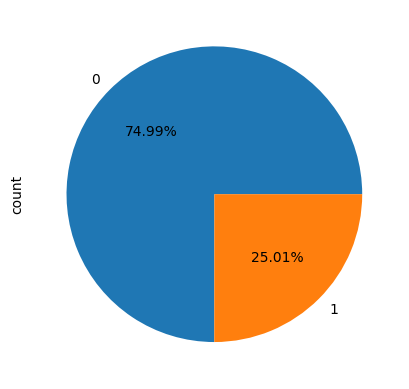

In [101]:
sub.plot(kind="pie",subplots=True,autopct="%1.2f%%")

In [102]:
def func(col):
    sns.boxplot(x=col,data=df)
    plt.show()

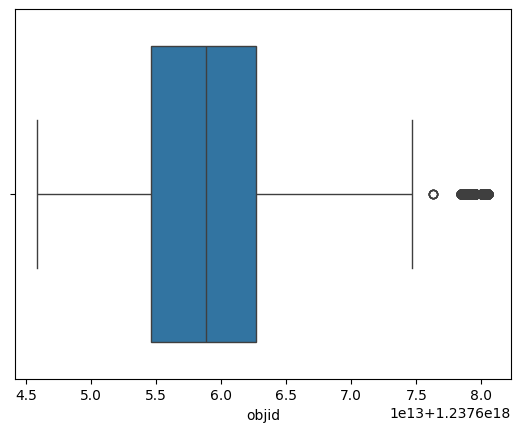

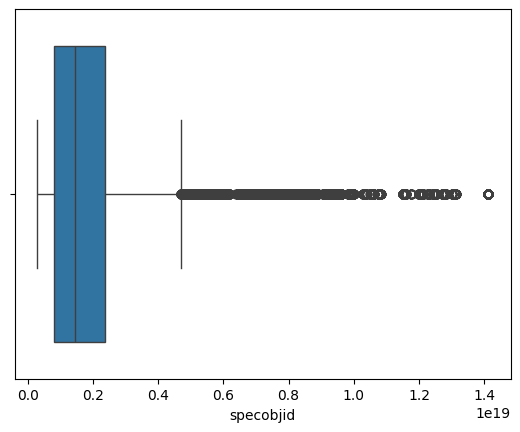

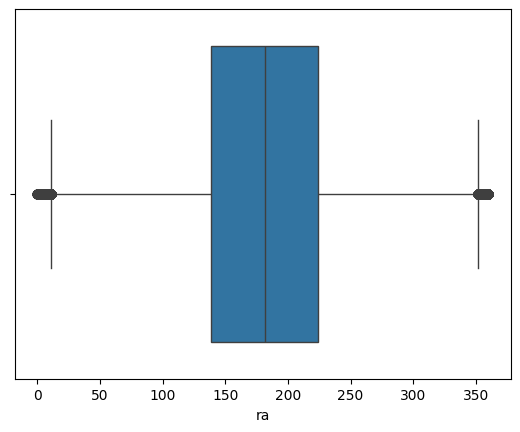

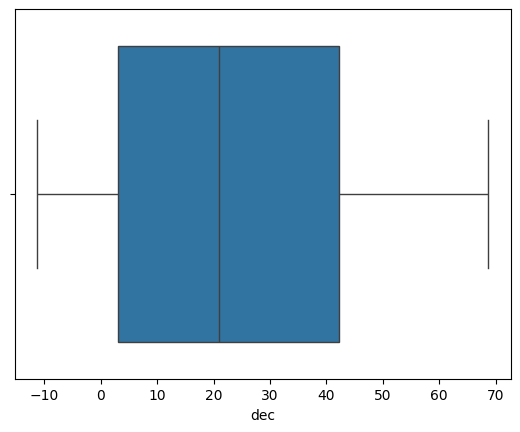

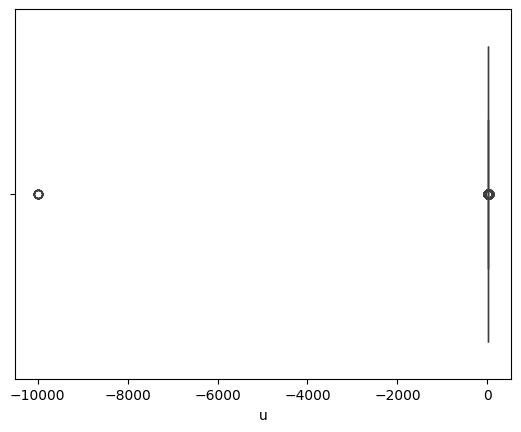

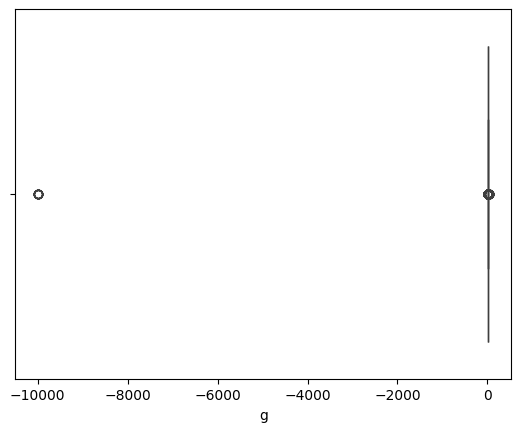

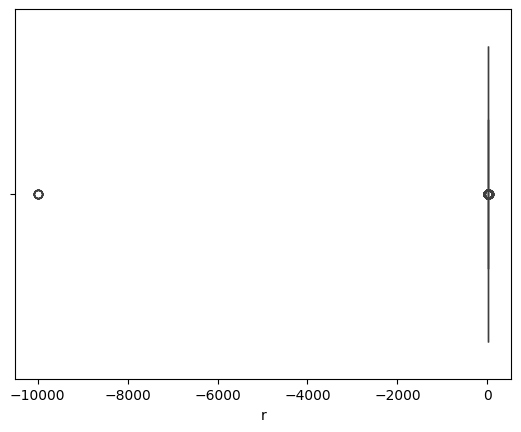

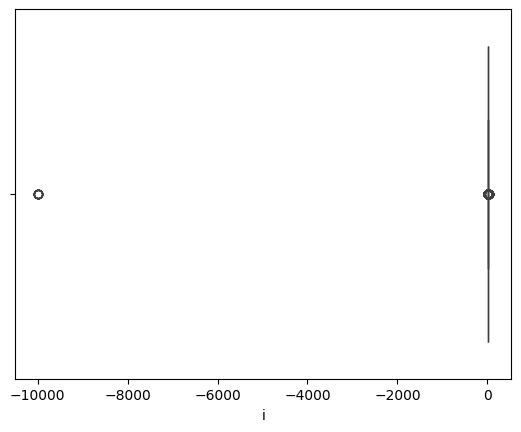

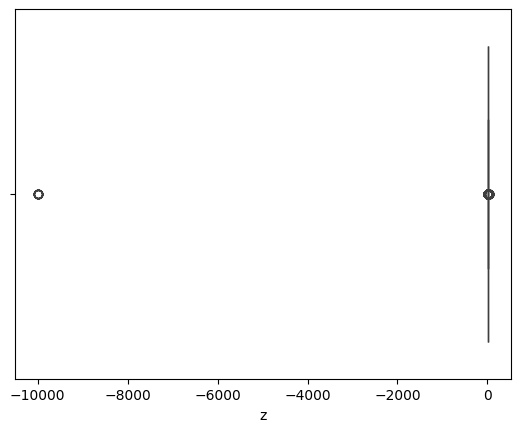

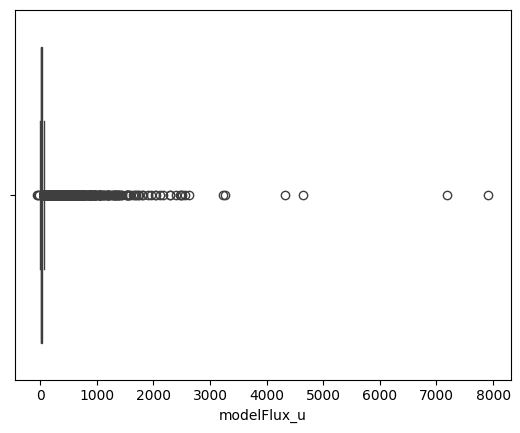

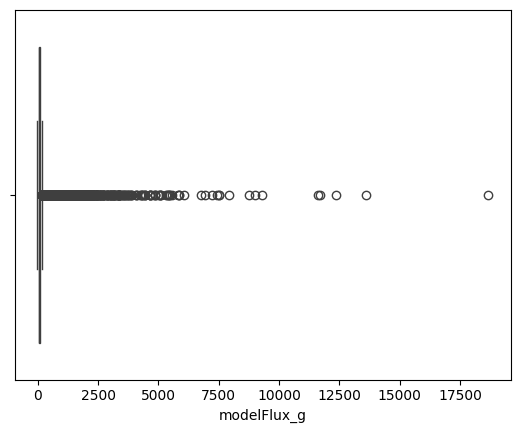

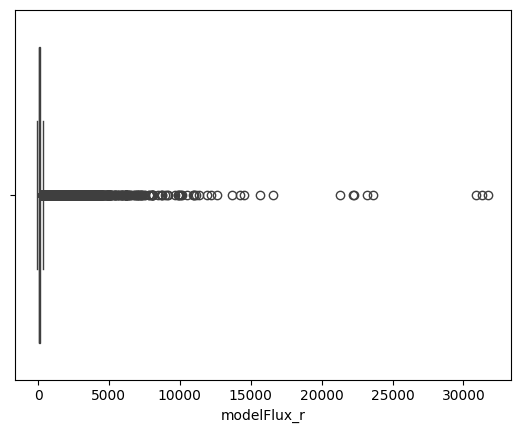

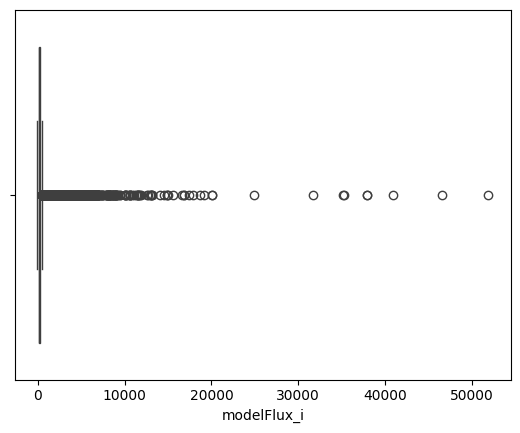

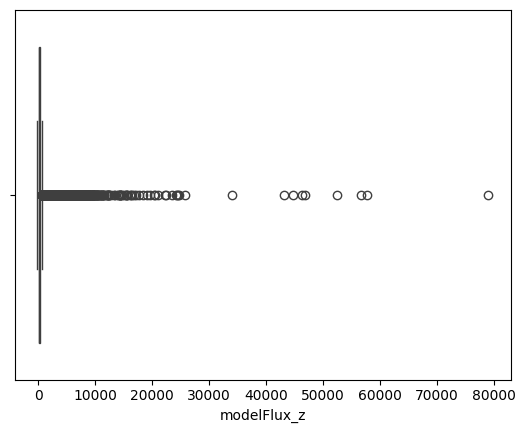

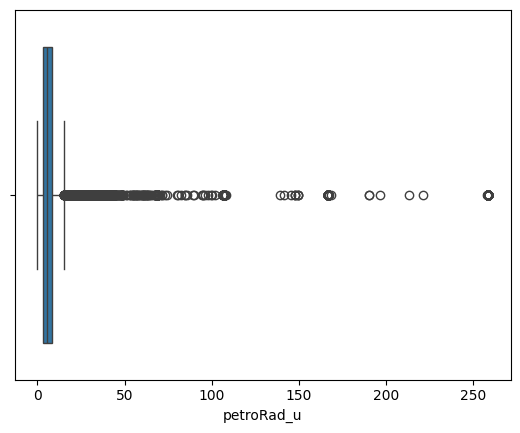

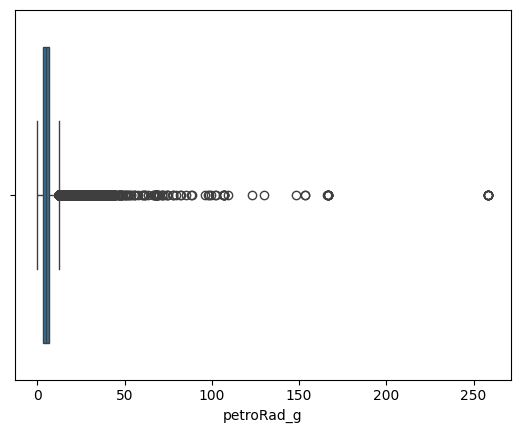

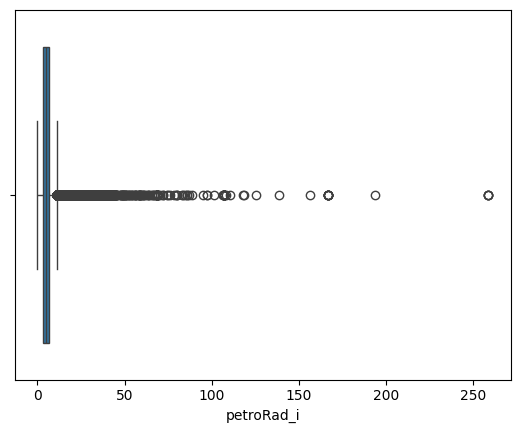

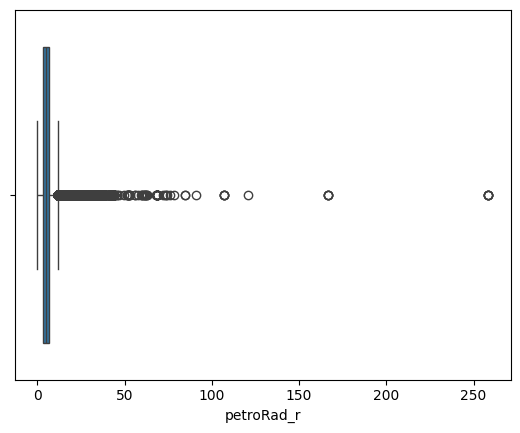

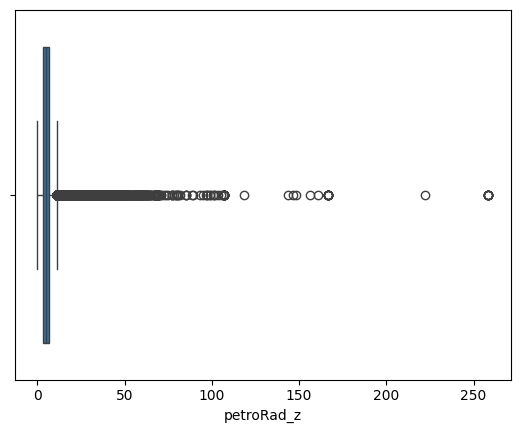

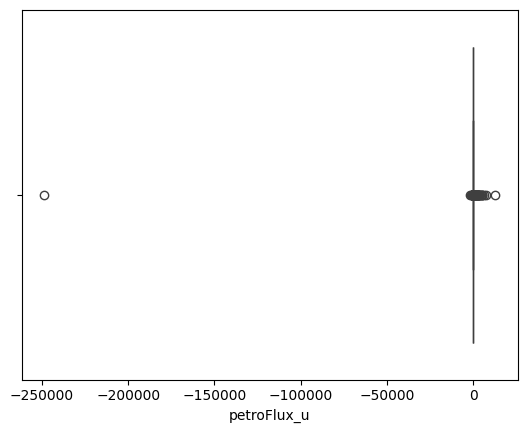

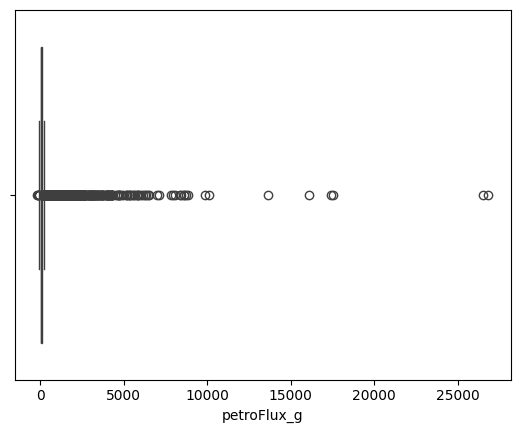

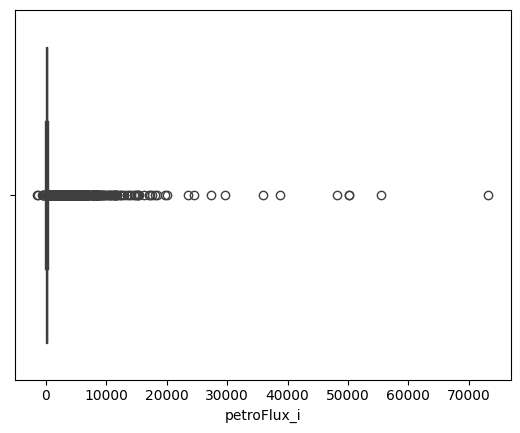

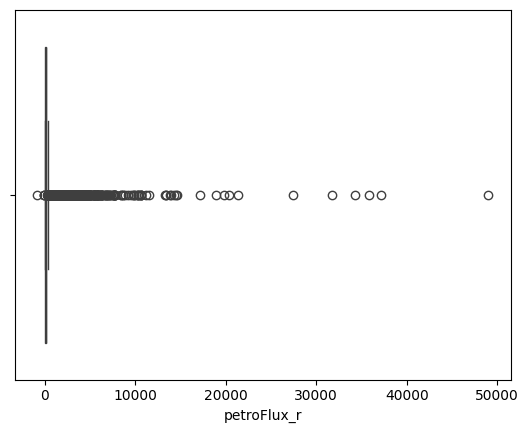

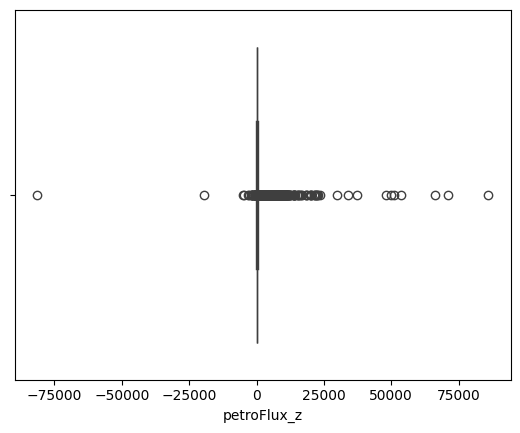

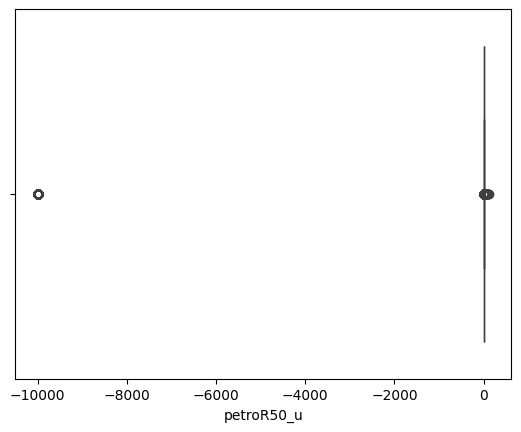

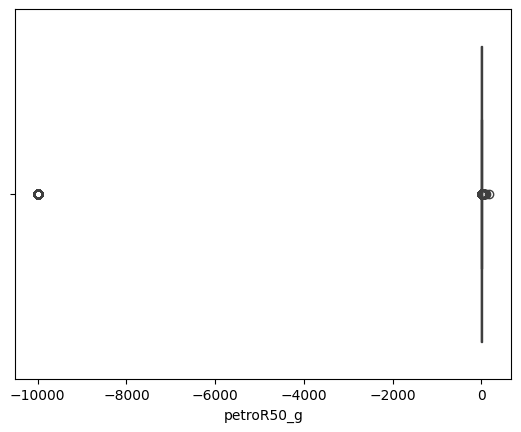

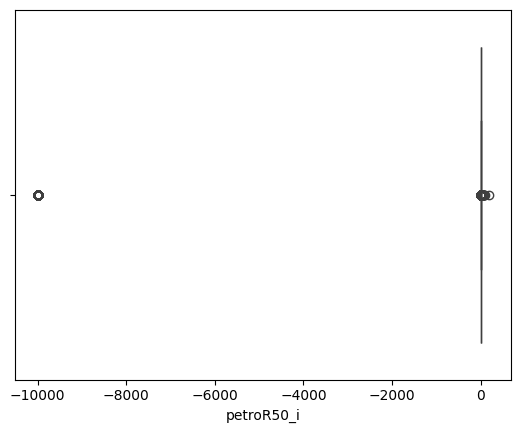

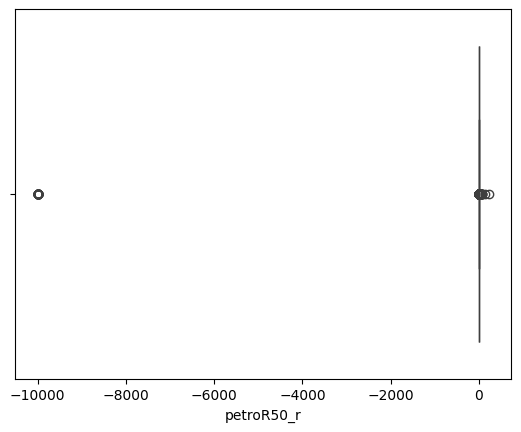

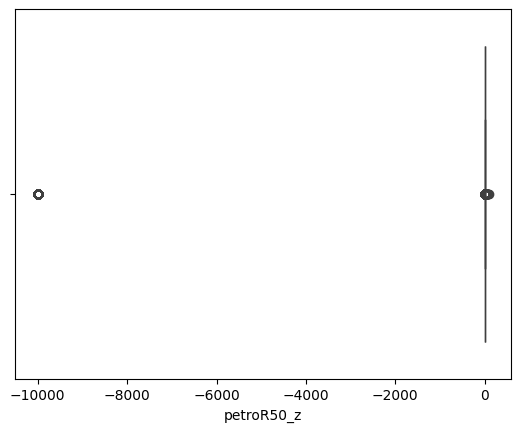

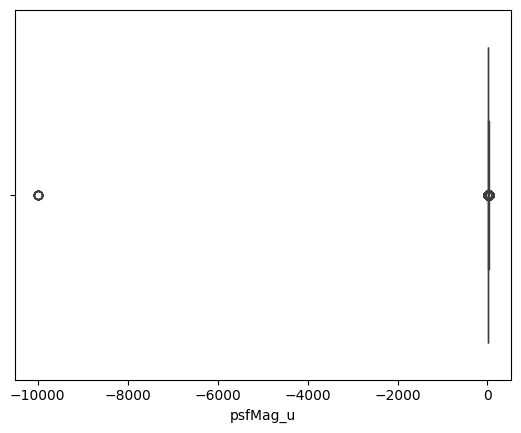

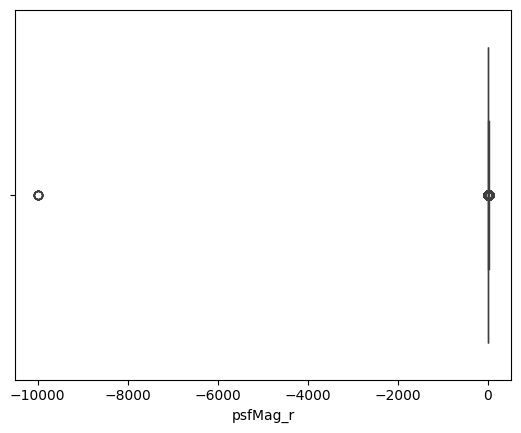

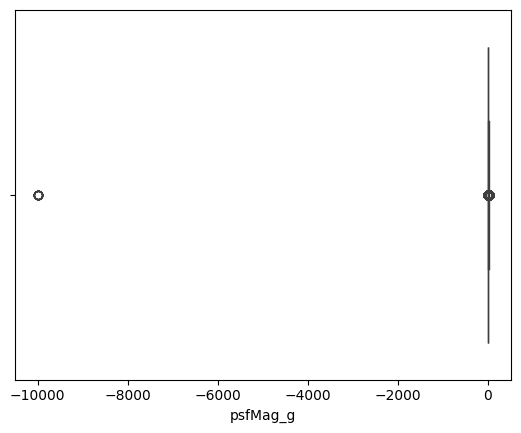

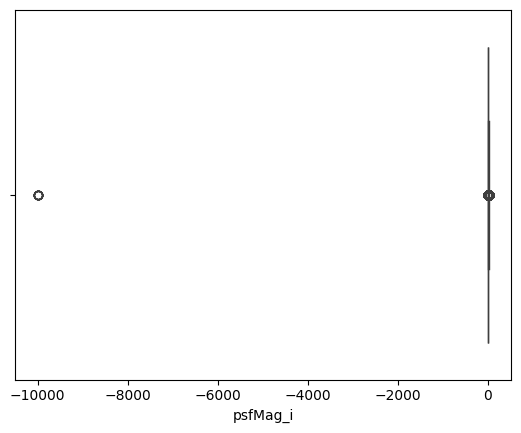

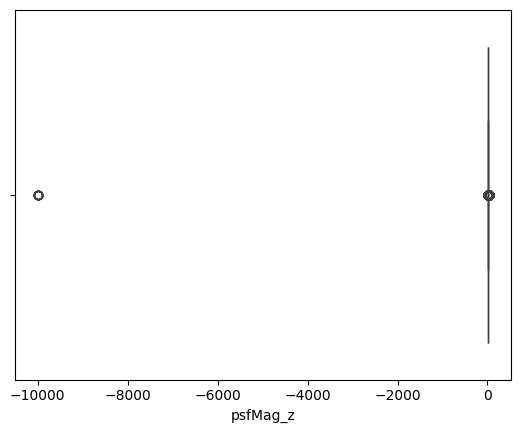

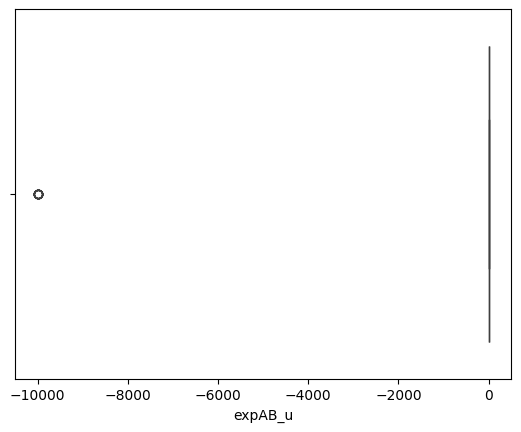

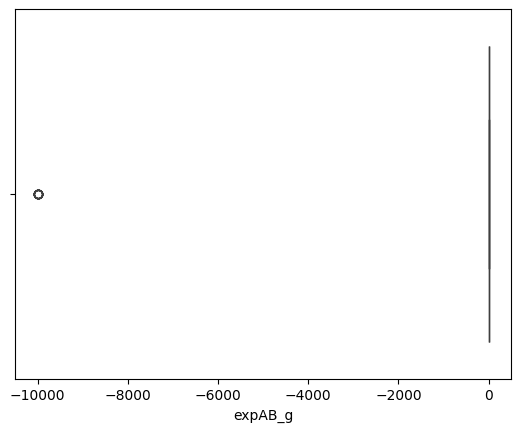

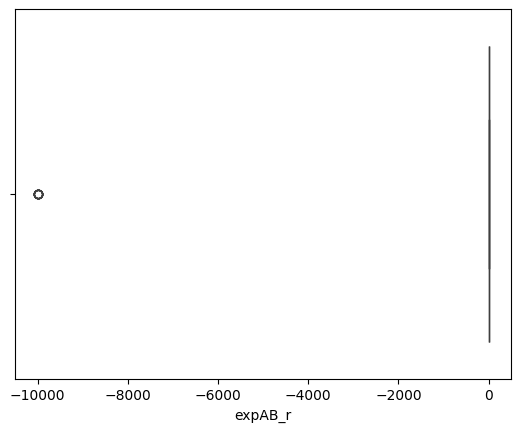

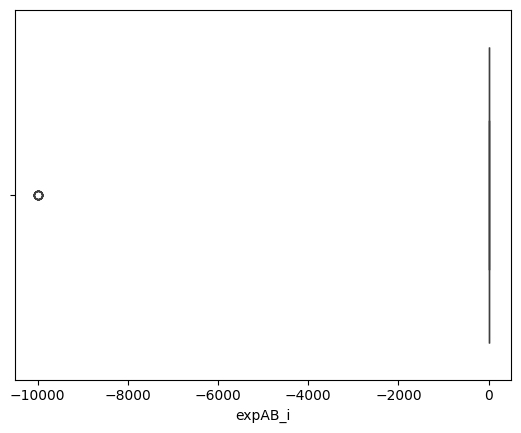

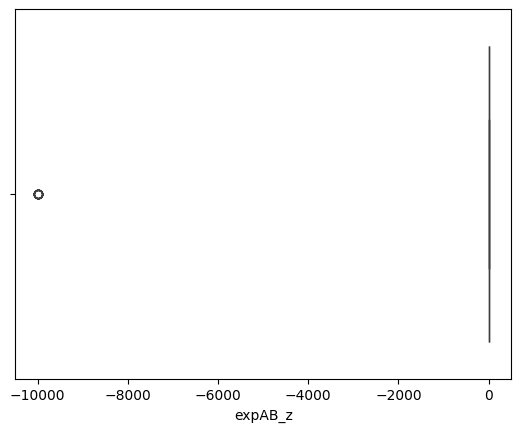

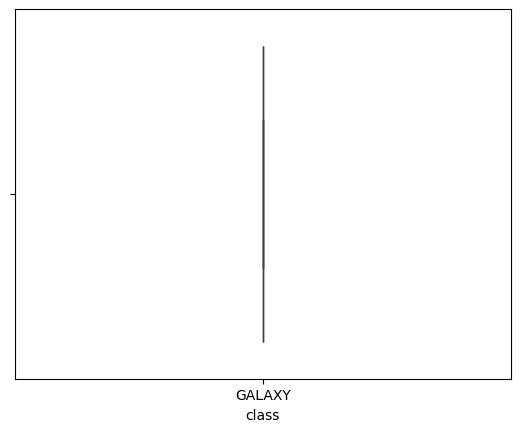

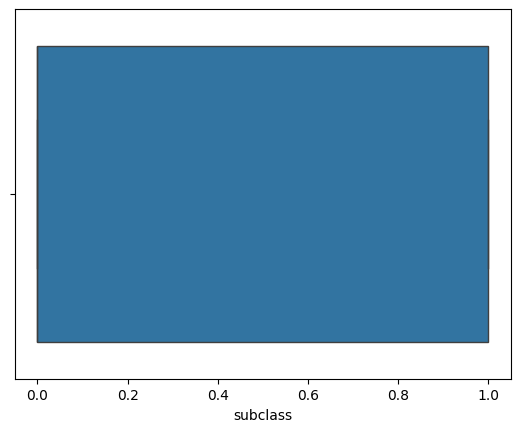

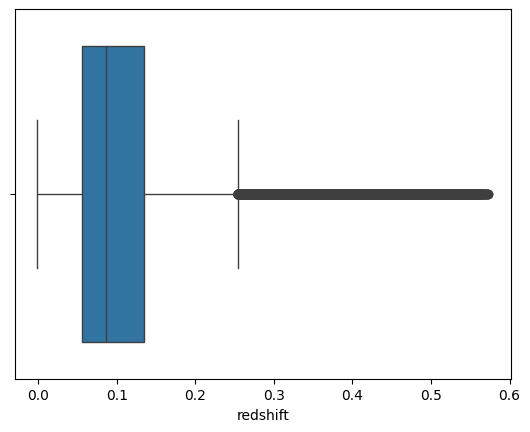

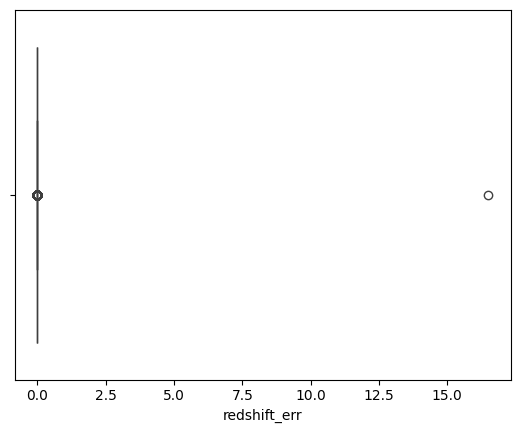

In [103]:
for i in df.columns:
    func(i)

<Axes: xlabel='subclass', ylabel='i'>

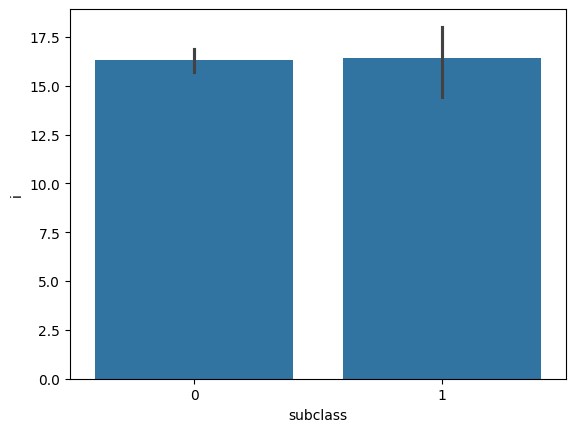

In [104]:
sns.barplot(x='subclass',y='i',data=df)

<Axes: xlabel='subclass', ylabel='z'>

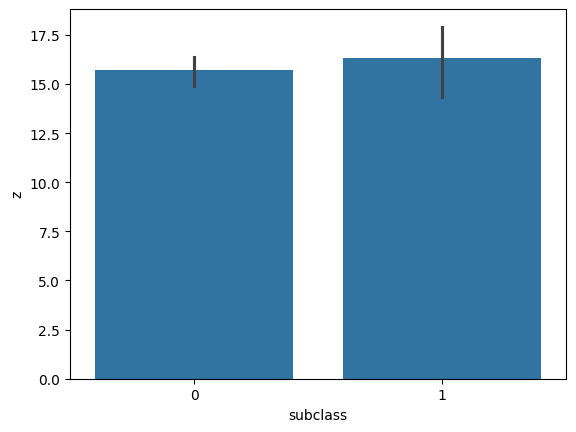

In [105]:
sns.barplot(x='subclass',y='z',data=df)

In [106]:
numeric_df = df.select_dtypes(include=['number'])

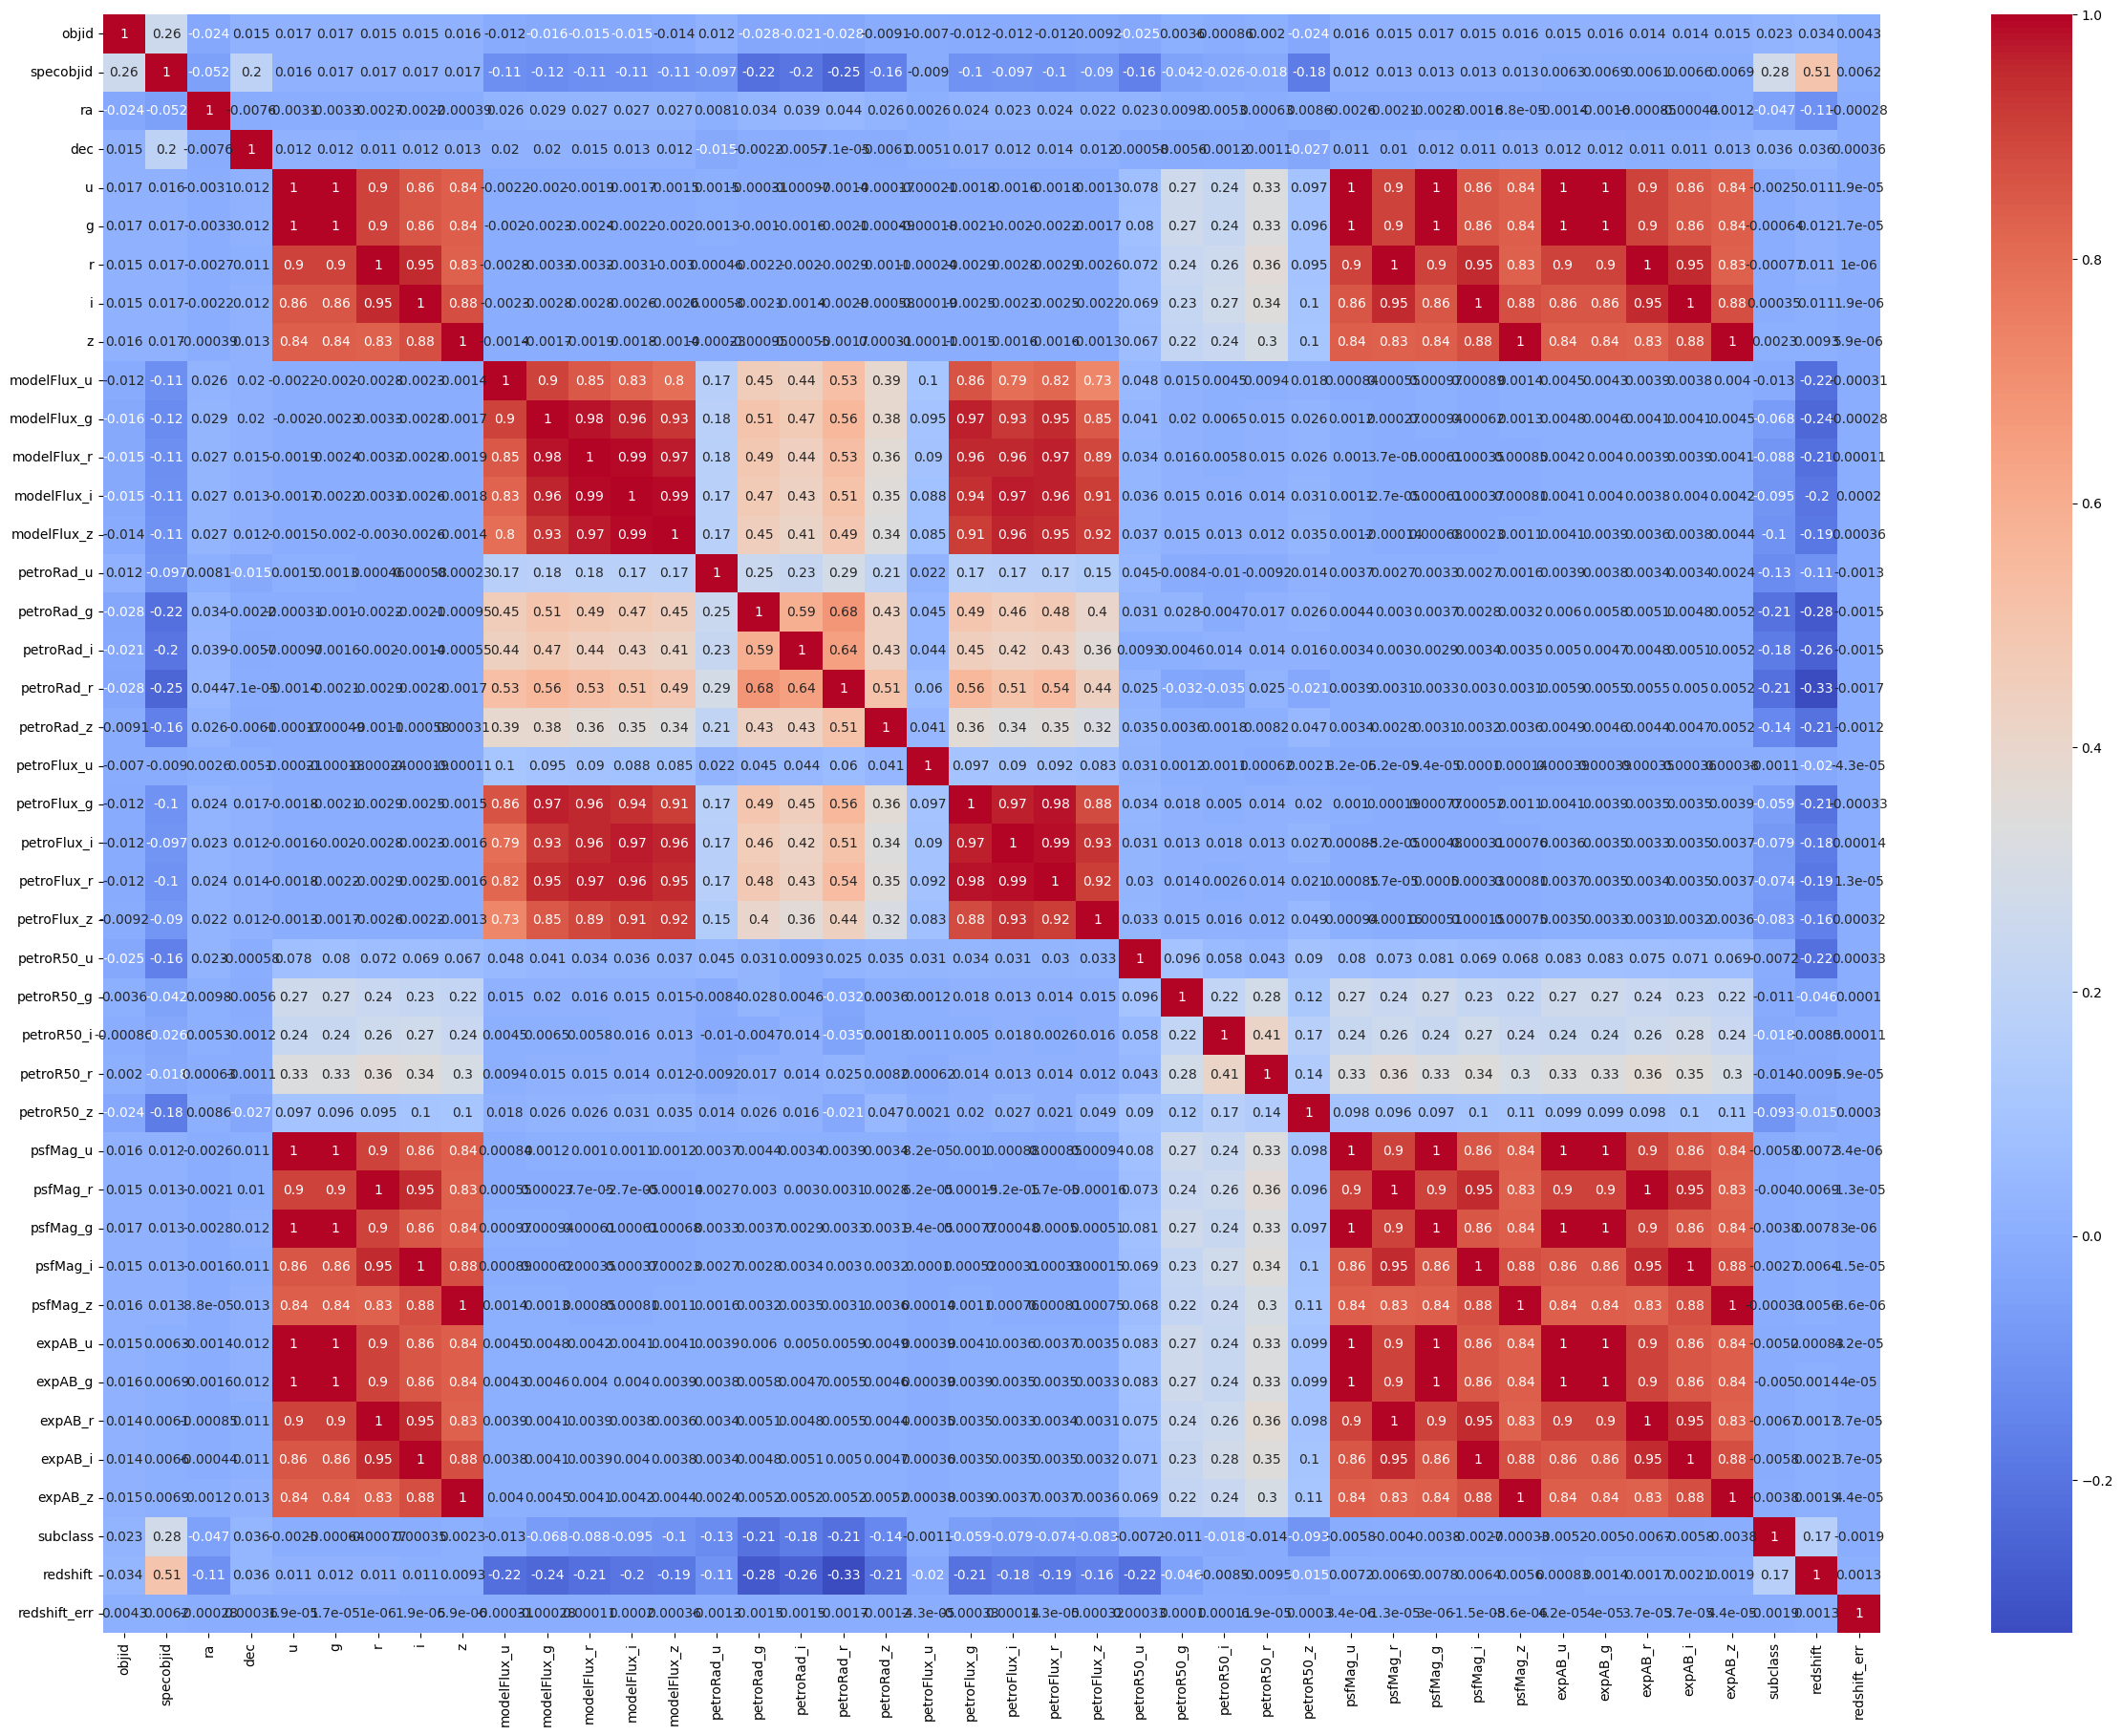

In [107]:
plt.figure(figsize=(30,22))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [108]:
quant = df['u'].quantile(q=[0.75, 0.25])
print(quant)

Q3 = quant.loc[0.75]
print(Q3)

Q1 = quant.loc[0.25]
print(Q1)

IQR = Q3 - Q1
print(IQR)

maxwhisker = Q3 + 1.5 * IQR
print(maxwhisker)

minwhisker = Q1 - 1.5 * IQR
print(minwhisker)


0.75    20.079470
0.25    18.762215
Name: u, dtype: float64
20.07947
18.762214999999998
1.317255000000003
22.055352500000005
16.786332499999993


<Axes: ylabel='u'>

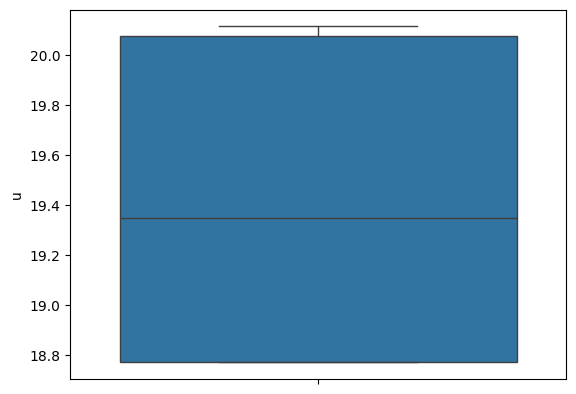

In [109]:
df['u'] = np.where(df['u'] > 20.116540, 20.116540, df['u'])
df['u'] = np.where(df['u'] < 18.772018, 18.772018, df['u'])

sns.boxplot(y='u', data=df)

In [110]:
x = df.drop(['subclass'], axis=1)
y = df['subclass']

In [111]:
X_numeric = x.select_dtypes(include=['int64', 'float64'])


In [112]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)

X_selected = selector.fit_transform(X_numeric, y)

selected_features = X_numeric.columns[selector.get_support()]

print("Selected features:", selected_features)

Selected features: Index(['u', 'modelFlux_i', 'modelFlux_z', 'petroRad_u', 'petroRad_g',
       'petroRad_i', 'petroRad_r', 'petroRad_z', 'petroR50_z', 'redshift'],
      dtype='object')


In [113]:
# Assuming your target column is 'subclass' in your DataFrame 'df'
x = df.drop(['subclass', 'class'], axis=1)
y = df['subclass']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Perform SMOTE oversampling
X_resampled, y_resampled = smote.fit_resample(x, y)

# Check the new value counts
print(pd.Series(y_resampled).value_counts())

subclass
0    74993
1    74993
Name: count, dtype: int64


In [114]:
df1 = df[['i', 'z', 'modelFlux_z', 'petroRad_g', 'petroRad_r',
          'petroFlux_z', 'petroR50_u', 'petroR50_g',
          'petroR50_i', 'petroR50_r', 'subclass']]

from sklearn.model_selection import train_test_split

x = df1[['i', 'z', 'modelFlux_z', 'petroRad_g', 'petroRad_r',
         'petroFlux_z', 'petroR50_u', 'petroR50_g',
         'petroR50_i', 'petroR50_r']]

y = df1['subclass']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20
)


In [115]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
sc = StandardScaler()

# Transform your data
scaled_data = sc.fit_transform(x_train)


In [116]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(x_test)

# Evaluate the classifier
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

print(accuracy_score(y_pred, y_test))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85     14933
           1       0.55      0.57      0.56      5067

    accuracy                           0.77     20000
   macro avg       0.70      0.71      0.70     20000
weighted avg       0.78      0.77      0.77     20000

0.7736


In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    recall_score,
    precision_score,
    confusion_matrix,
    f1_score
)

lg = LogisticRegression()

log = lg.fit(x_train, y_train)

y_pred = lg.predict(x_test)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("-------------------------")
print("Classification report:\n", classification_report(y_test, y_pred))

print(accuracy_score(y_pred, y_test))


Confusion Matrix: 
 [[14771   162]
 [ 4733   334]]
-------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.76      0.99      0.86     14933
           1       0.67      0.07      0.12      5067

    accuracy                           0.76     20000
   macro avg       0.72      0.53      0.49     20000
weighted avg       0.74      0.76      0.67     20000

0.75525


In [118]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [119]:
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)


In [120]:
from sklearn.metrics import confusion_matrix, classification_report

print("TRAIN CONFUSION MATRIX")
print(confusion_matrix(y_train, y_train_pred))

print("TRAIN CLASSIFICATION REPORT")
print(classification_report(y_train, y_train_pred))

print("TEST CONFUSION MATRIX")
print(confusion_matrix(y_test, y_test_pred))

print("TEST CLASSIFICATION REPORT")
print(classification_report(y_test, y_test_pred))


TRAIN CONFUSION MATRIX
[[60060     0]
 [    2 19938]]
TRAIN CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60060
           1       1.00      1.00      1.00     19940

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000

TEST CONFUSION MATRIX
[[13926  1007]
 [ 2173  2894]]
TEST CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     14933
           1       0.74      0.57      0.65      5067

    accuracy                           0.84     20000
   macro avg       0.80      0.75      0.77     20000
weighted avg       0.83      0.84      0.83     20000



In [121]:
confusion_matrix(y_train, y_train_pred)


array([[60060,     0],
       [    2, 19938]])

In [122]:
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))


0.999975
0.841


In [123]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [124]:
import pickle

pickle.dump(rf, open("RF.pkl", "wb"))


In [125]:
rf.predict([[16.946170, 16.708910, 207.218700, 4.180779, 4.060687,
             194.731000, 2.141953, 2.149080, 2.056686, 2.055798]])


array([0])

In [126]:
rf.predict([[17.675285, 17.52775, 104.25655, 3.397512, 3.424717,
             90.717547, 1.613005, 1.632243, 1.548225, 1.596137]])


array([1])

In [127]:
import pickle

print(type(rf))  # MUST show RandomForestClassifier

with open("RF.pkl", "wb") as f:
    pickle.dump(rf, f)

print("Model saved successfully")


<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Model saved successfully
